image 1: n02363005_329.JPEG
image 2: n02363005_1059.JPEG


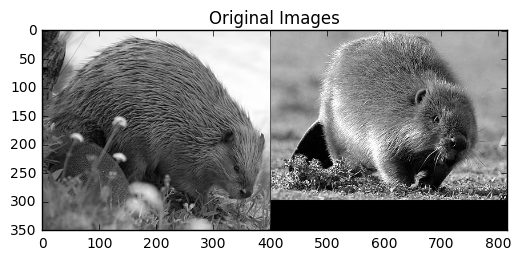

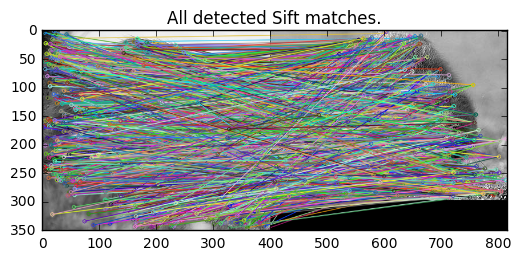

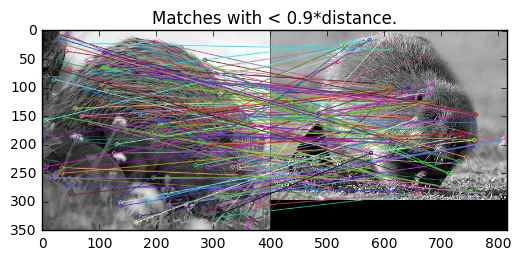

In [14]:
import cv2 
import matplotlib.pyplot as plt
import numpy
import os
from os import listdir
from os.path import isfile, join
import pylab

pos_images = '/Users/ishanhanda/Documents/NYU_Fall16/Comp_Vision/Project/ProjectWorkspace/Sift/positive/'

image1_name = 'n02363005_329.JPEG'
image2_name = 'n02363005_1059.JPEG'

sift = cv2.xfeatures2d.SIFT_create()

print("image 1:", image1_name)
img1 = cv2.imread(pos_images + image1_name, 0)
kp1, des1 = sift.detectAndCompute(img1, None)

print("image 2:", image2_name)
img2 = cv2.imread(pos_images + image2_name, 0)
kp2, des2 = sift.detectAndCompute(img2, None)
        
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)
        
good = []
for m, n in matches:
    if m.distance < 0.9 * n.distance:
        good.append([m])


img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags = 2)
img4 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, flags = 2)
img5 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, [], None, flags = 2)

plt.title('Original Images')
plt.imshow(img5)
pylab.savefig('Sift_Original.png')
plt.show()

plt.title('All detected Sift matches.')
plt.imshow(img4)
pylab.savefig('Sift_All_Matches.png')
plt.show()

plt.title('Matches with < 0.9*distance.')
plt.imshow(img3)
pylab.savefig('Sift_Distance_ratio_matches.png')
plt.show()